<a href="https://colab.research.google.com/github/MMAITeamDufferin/excel-together/blob/master/mmai894.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
#Load packages

from numpy import array
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import robust_scale
from sklearn.pipeline import Pipeline
from scipy import stats

#Import Data and convert into dataframes


CE = open("/content/drive/My Drive/hydraulic/CE.txt", "r") # open the file for reading
CP = open("/content/drive/My Drive/hydraulic/CP.txt", "r")
EPS1 = open("/content/drive/My Drive/hydraulic/EPS1.txt", "r")
FS1 = open("/content/drive/My Drive/hydraulic/FS1.txt", "r")
FS2 = open("/content/drive/My Drive/hydraulic/FS2.txt", "r")
profile = open("/content/drive/My Drive/hydraulic/profile.txt", "r")
PS1 = open("/content/drive/My Drive/hydraulic/PS1.txt", "r")
PS2 = open("/content/drive/My Drive/hydraulic/PS2.txt", "r")
PS3 = open("/content/drive/My Drive/hydraulic/PS3.txt", "r")
PS4 = open("/content/drive/My Drive/hydraulic/PS4.txt", "r")
PS5 = open("/content/drive/My Drive/hydraulic/PS5.txt", "r")
PS6 = open("/content/drive/My Drive/hydraulic/PS6.txt", "r")
SE = open("/content/drive/My Drive/hydraulic/SE.txt", "r")
TS1 = open("/content/drive/My Drive/hydraulic/TS1.txt", "r")
TS2 = open("/content/drive/My Drive/hydraulic/TS2.txt", "r")
TS3 = open("/content/drive/My Drive/hydraulic/TS3.txt", "r")
TS4 = open("/content/drive/My Drive/hydraulic/TS4.txt", "r")
VS1 = open("/content/drive/My Drive/hydraulic/VS1.txt", "r")

from numpy import array
CE_data = [ ]
for row_num, line in enumerate(CE):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        CE_data.append([float(v) for v in values])
CE_df = pd.DataFrame(data = CE_data)       

CE.close() # close the file


CP_data = [ ]
for row_num, line in enumerate(CP):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        CP_data.append([float(v) for v in values])
CP_df = pd.DataFrame(data = CP_data)
CP.close()

profile_data = [ ]
for row_num, line in enumerate(profile):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        profile_data.append([float(v) for v in values])
profile_df = pd.DataFrame(data = profile_data)
profile.close()


EPS1_data = [ ]
for row_num, line in enumerate(EPS1):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        EPS1_data.append([float(v) for v in values])
EPS1_df = pd.DataFrame(data = EPS1_data)
EPS1.close()

FS1_data = [ ]
for row_num, line in enumerate(FS1):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        FS1_data.append([float(v) for v in values])
FS1_df = pd.DataFrame(data = FS1_data)
FS1.close()

FS2_data = [ ]
for row_num, line in enumerate(FS2):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        FS2_data.append([float(v) for v in values])
FS2_df = pd.DataFrame(data = FS2_data)
FS2.close()

PS1_data = [ ]
for row_num, line in enumerate(PS1):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        PS1_data.append([float(v) for v in values])
PS1_df = pd.DataFrame(data = PS1_data)
PS1.close()

PS2_data = [ ]
for row_num, line in enumerate(PS2):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        PS2_data.append([float(v) for v in values])
PS2_df = pd.DataFrame(data = PS2_data)
PS2.close()

PS3_data = [ ]
for row_num, line in enumerate(PS3):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        PS3_data.append([float(v) for v in values])
PS3_df = pd.DataFrame(data = PS3_data)
PS3.close()

PS4_data = [ ]
for row_num, line in enumerate(PS4):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        PS4_data.append([float(v) for v in values])
PS4_df = pd.DataFrame(data = PS4_data)
PS4.close()

PS5_data = [ ]
for row_num, line in enumerate(PS5):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        PS5_data.append([float(v) for v in values])
PS5_df = pd.DataFrame(data = PS5_data)
PS5.close()

PS6_data = [ ]
for row_num, line in enumerate(PS6):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        PS6_data.append([float(v) for v in values])
PS6_df = pd.DataFrame(data = PS6_data)
PS6.close()

SE_data = [ ]
for row_num, line in enumerate(SE):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        SE_data.append([float(v) for v in values])
SE_df = pd.DataFrame(data = SE_data)
SE.close()

TS1_data = [ ]
for row_num, line in enumerate(TS1):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        TS1_data.append([float(v) for v in values])
TS1_df = pd.DataFrame(data = TS1_data)
TS1.close()

TS2_data = [ ]
for row_num, line in enumerate(TS2):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        TS2_data.append([float(v) for v in values])
TS2_df = pd.DataFrame(data = TS2_data)
TS2.close()

TS3_data = [ ]
for row_num, line in enumerate(TS3):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        TS3_data.append([float(v) for v in values])
TS3_df = pd.DataFrame(data = TS3_data)
TS3.close()

TS4_data = [ ]
for row_num, line in enumerate(TS4):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        TS4_data.append([float(v) for v in values])
TS4_df = pd.DataFrame(data = TS4_data)
TS4.close()

VS1_data = [ ]
for row_num, line in enumerate(VS1):

    # Remove the new line at the end and then split the string based on
    # tabs. This creates a python list of the values.
    values = line.strip().split('\t')
    if row_num == 0: # first line is the header
         header = values
    else:
        VS1_data.append([float(v) for v in values])
VS1_df = pd.DataFrame(data = VS1_data)
VS1.close()

Using TensorFlow backend.


In [0]:
# Seperating the Profile into each target variables
y_coolerCondition = pd.DataFrame(profile_df.iloc[:, 0])
y_valveCondition = pd.DataFrame(profile_df.iloc[:, 1])
y_pumpLeak = pd.DataFrame(profile_df.iloc[:, 2])
y_hydraulicAcc = pd.DataFrame(profile_df.iloc[:, 3])
y_stableFlag = pd.DataFrame(profile_df.iloc[:, 4])

In [0]:
def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1
  
  

In [0]:
PS1 = pd.DataFrame(mean_conversion(PS1_df))
PS1.columns = ['PS1']

PS2 = pd.DataFrame(mean_conversion(PS2_df))
PS2.columns = ['PS2']

PS3 = pd.DataFrame(mean_conversion(PS3_df))
PS3.columns = ['PS3']

PS4 = pd.DataFrame(mean_conversion(PS4_df))
PS4.columns = ['PS4']

PS5 = pd.DataFrame(mean_conversion(PS5_df))
PS5.columns = ['PS5']

PS6 = pd.DataFrame(mean_conversion(PS6_df))
PS6.columns = ['PS6']

FS1 = pd.DataFrame(mean_conversion(FS1_df))
FS1.columns = ['FS1']

FS2 = pd.DataFrame(mean_conversion(FS2_df))
FS2.columns = ['FS2']

TS1 = pd.DataFrame(mean_conversion(TS1_df))
TS1.columns = ['TS1']

TS2 = pd.DataFrame(mean_conversion(TS2_df))
TS2.columns = ['TS2']

TS3 = pd.DataFrame(mean_conversion(TS3_df))
TS3.columns = ['TS3']

TS4 = pd.DataFrame(mean_conversion(TS4_df))
TS4.columns = ['TS4']

P1 = pd.DataFrame(mean_conversion(EPS1_df))
P1.columns = ['P1']

VS1 = pd.DataFrame(mean_conversion(VS1_df))
VS1.columns = ['VS1']

CE = pd.DataFrame(mean_conversion(CE_df))
CE.columns = ['CE']

CP = pd.DataFrame(mean_conversion(CP_df))
CP.columns = ['CP']

SE = pd.DataFrame(mean_conversion(SE_df))
SE.columns = ['SE']

In [0]:
# Merge all the dataframes together
X = pd.concat([PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, P1, VS1, CE, CP, SE], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15cfdf8f98>,
      dtype=object)

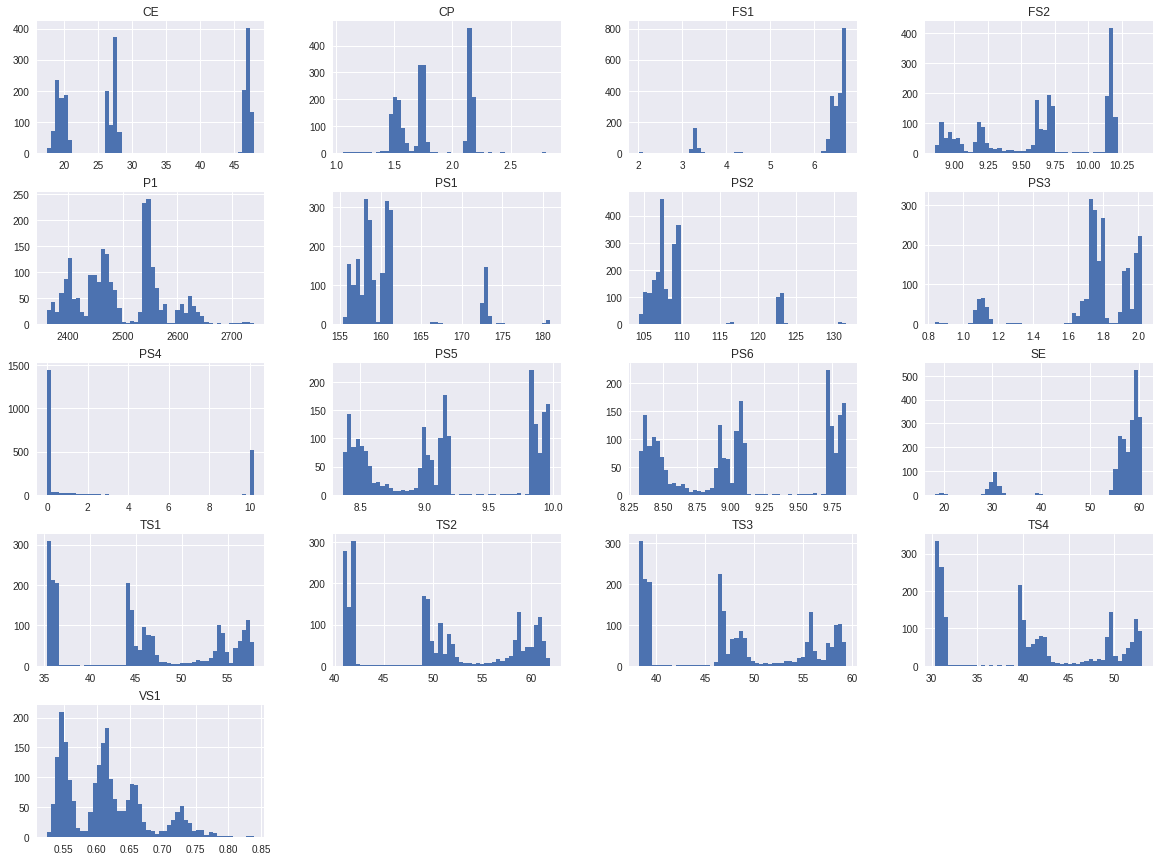

In [8]:
# Create visualization using histogram
X.hist(bins=50, figsize=(20, 15))

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import xgboost as xgb
import os

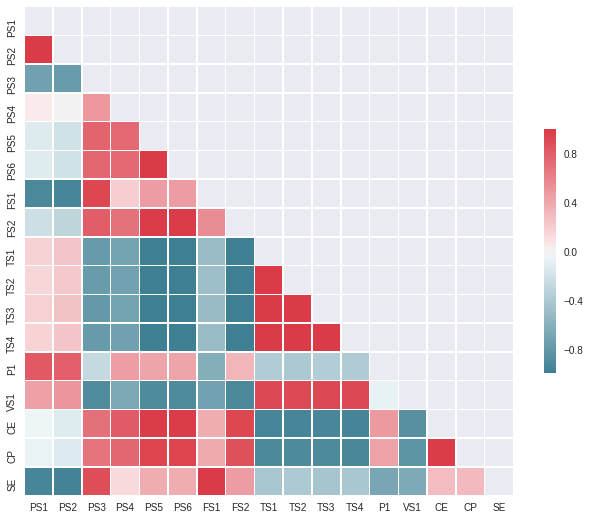

In [10]:
# Visualize correlations among the variables
corr_matrix = X.corr()

#plot heat map for correlation matrix (from https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5,1,'PCA explained variance vs. n componets')

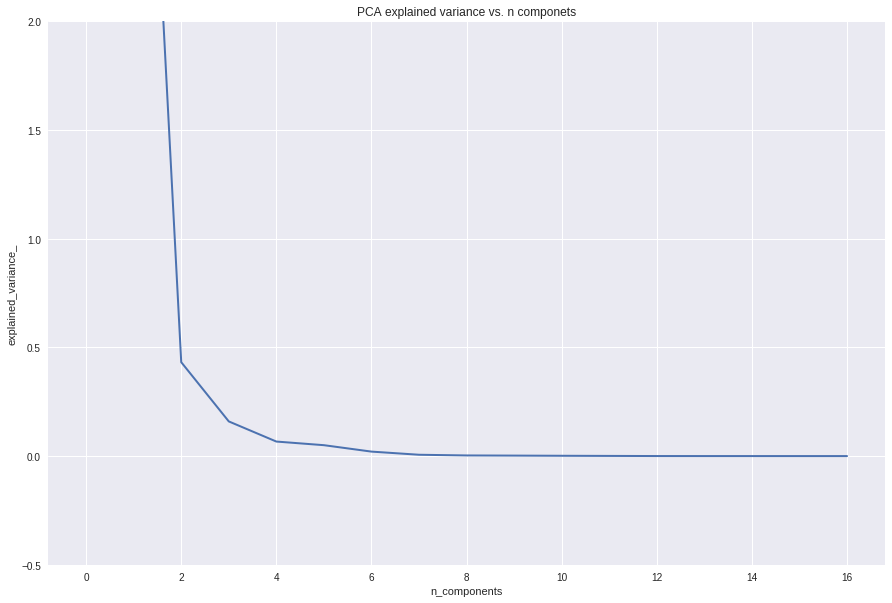

In [11]:
#normalize the X values
X_normalize = StandardScaler().fit_transform(X)

#apply PCA to visulaize the data in cluster
from sklearn.decomposition import PCA
#find explained variance and n_components

pca = PCA()
pca.fit(X_normalize)
plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.ylim(-0.5, 2)
plt.title('PCA explained variance vs. n componets')

(2204, 17)
(2204, 2)


Text(0.5,1,'Clustering of data when PCA dimension =2')

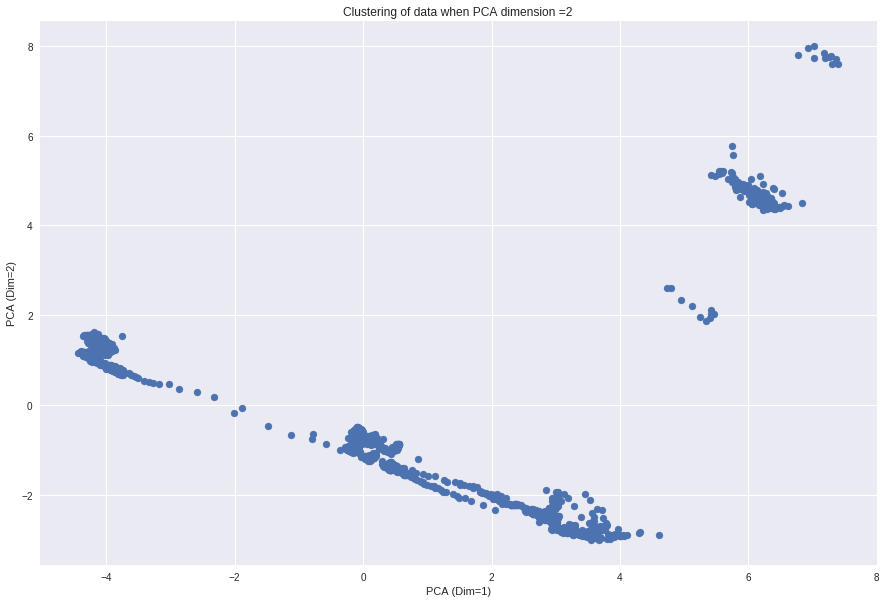

In [12]:
#observe distribution when n_componets = 2
pca_2 = PCA(2)
projected = pca_2.fit_transform(X_normalize)
print(X.shape)
print(projected.shape)
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:,1])
plt.xlabel('PCA (Dim=1)')
plt.ylabel('PCA (Dim=2)')
plt.title('Clustering of data when PCA dimension =2')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        82
        20.0       1.00      1.00      1.00        70
       100.0       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



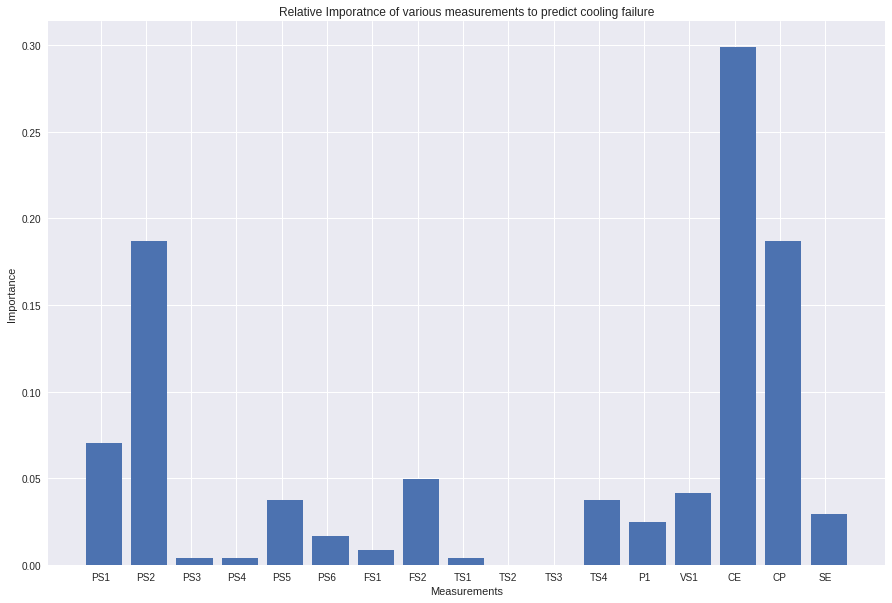

None


In [16]:
#let's predict the cooling failure
predict_pump_performance(X_normalize, y_coolerCondition, 'cooling failure')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        73.0       0.97      1.00      0.99        39
        80.0       0.97      0.95      0.96        41
        90.0       0.86      0.77      0.81        31
       100.0       0.94      0.96      0.95       110

   micro avg       0.94      0.94      0.94       221
   macro avg       0.94      0.92      0.93       221
weighted avg       0.94      0.94      0.94       221



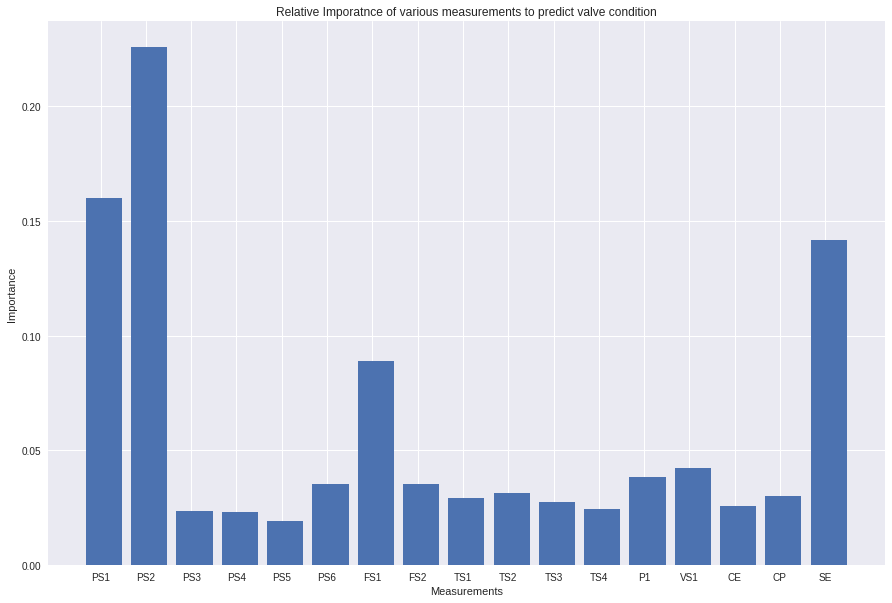

None


In [17]:
predict_pump_performance(X_normalize, y_valveCondition, 'valve condition')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       123
         1.0       0.98      0.94      0.96        53
         2.0       0.98      1.00      0.99        45

   micro avg       0.98      0.98      0.98       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221



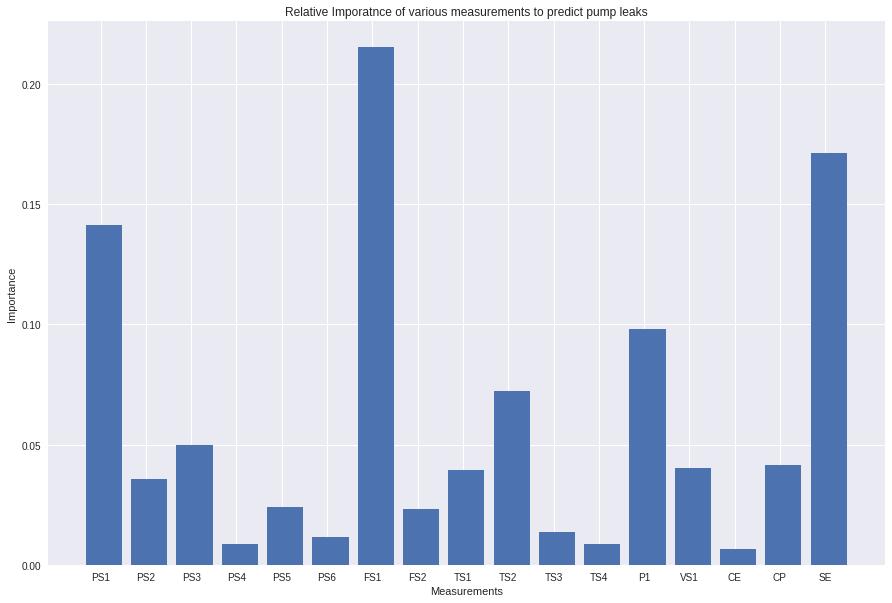

None


In [18]:
predict_pump_performance(X_normalize, y_pumpLeak, 'pump leaks')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        90.0       0.99      0.96      0.97        78
       100.0       0.94      0.87      0.91        39
       115.0       0.88      0.97      0.92        36
       130.0       0.99      1.00      0.99        68

   micro avg       0.96      0.96      0.96       221
   macro avg       0.95      0.95      0.95       221
weighted avg       0.96      0.96      0.96       221



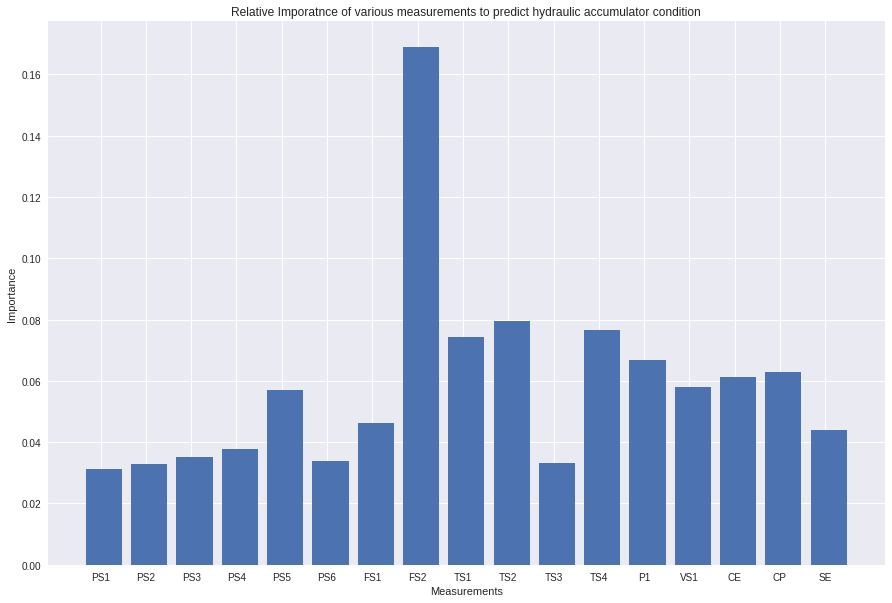

None


In [19]:
predict_pump_performance(X_normalize, y_hydraulicAcc, 'hydraulic accumulator condition')

In [33]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
# fix random seed for reproducibility
seed = 823
np.random.seed(seed)


X.shape
y_valveCondition.shape

#Create Predictors and Target Dfs
X_predictors = X
y_target = y_valveCondition

X_predictors.shape


#Convert Target Classes to One Hot Encoded Matrix
y_target_matrix = np_utils.to_categorical(y_target)


y_target_matrix.shape


# define baseline model
def baseline_model():
	# create model
	base_model = Sequential()
	base_model.add(Dense(50, input_dim=17, activation='relu'))
	base_model.add(BatchNormalization())
	base_model.add(Dropout(0.5))
	base_model.add(Dense(50,activation='relu'))
	base_model.add(Dropout(0.5))
	base_model.add(BatchNormalization())
	base_model.add(Dense(50,activation='relu'))
	base_model.add(Dense(101, activation='softmax'))
	# Compile model
	base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return base_model

base_estimator = KerasClassifier(build_fn=baseline_model, epochs=110, batch_size=30, verbose=1) #Change epochs to 10, batch_size to 2201

#fit model
base_estimator.fit(X_predictors, y_target_matrix)



Epoch 1/110
2204/2204 [==============================] - 3s 1ms/step - loss: 3.4272 - acc: 0.2936
Epoch 2/110
2204/2204 [==============================] - 0s 88us/step - loss: 1.5696 - acc: 0.4678
Epoch 3/110
2204/2204 [==============================] - 0s 89us/step - loss: 1.2776 - acc: 0.4946
Epoch 4/110
2204/2204 [==============================] - 0s 93us/step - loss: 1.2536 - acc: 0.4982
Epoch 5/110
2204/2204 [==============================] - 0s 89us/step - loss: 1.2252 - acc: 0.5032
Epoch 6/110
2204/2204 [==============================] - 0s 88us/step - loss: 1.1959 - acc: 0.5141
Epoch 7/110
2204/2204 [==============================] - 0s 92us/step - loss: 1.1592 - acc: 0.5136
Epoch 8/110
2204/2204 [==============================] - 0s 90us/step - loss: 1.1919 - acc: 0.5141
Epoch 9/110
2204/2204 [==============================] - 0s 91us/step - loss: 1.1615 - acc: 0.5227
Epoch 10/110
2204/2204 [==============================] - 0s 89us/step - loss: 1.1468 - acc: 0.5236
Epoch 11/1

In [36]:
# MLP with grid search via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy
 
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=17, kernel_initializer=init, activation='relu'))
	model.add(Dense(8, kernel_initializer=init, activation='relu'))
	model.add(Dense(5, kernel_initializer=init, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [5, 10, 15]
batches = [5, 10, 2201]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, profile_df)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.221779 using {'batch_size': 10, 'epochs': 5, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.199819 (0.029398) with: {'batch_size': 5, 'epochs': 5, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.220145 (0.031781) with: {'batch_size': 5, 'epochs': 5, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.198185 (0.030560) with: {'batch_size': 5, 'epochs': 5, 'init': 'normal', 'optimizer': 'rmsprop'}
0.155717 (0.029519) with: {'batch_size': 5, 'epochs': 5, 'init': 'normal', 'optimizer': 'adam'}
0.155717 (0.029519) with: {'batch_size': 5, 'epochs': 5, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.198094 (0.032346) with: {'batch_size': 5, 'epochs': 5, 'init': 'uniform', 'optimizer': 'adam'}
0.177768 (0.052001) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.176044 (0.053035) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.177768 (0.002003) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'opti